In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df=pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/02_BasicMLAlgorithms/auto-mpg.data'
               ,delim_whitespace=True,na_values=['?','&&&','-'],#Add na-values --> such as ? to ignore
              names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']) #Add column names
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [4]:
! dir C:\Users\thang\Documents\Thangamani\NUS\courseware\mldds-courseware\02_BasicMLAlgorithms

 Volume in drive C is Windows
 Volume Serial Number is E61D-603F

 Directory of C:\Users\thang\Documents\Thangamani\NUS\courseware\mldds-courseware\02_BasicMLAlgorithms

29/06/2018  03:06 PM    <DIR>          .
29/06/2018  03:06 PM    <DIR>          ..
27/06/2018  06:56 PM    <DIR>          .ipynb_checkpoints
17/06/2018  11:01 PM    <DIR>          assets
27/06/2018  06:48 PM            30,286 auto-mpg.data
27/06/2018  06:55 PM             1,660 auto-mpg.names
17/06/2018  11:01 PM            33,268 classification.ipynb
17/06/2018  11:01 PM           339,549 classification.slides.html
17/06/2018  11:01 PM            31,751 clustering.ipynb
17/06/2018  11:01 PM           345,322 clustering.slides.html
17/06/2018  11:01 PM               174 custom.css
17/06/2018  11:01 PM            47,176 decision-trees.ipynb
17/06/2018  11:01 PM           364,391 decision-trees.slides.html
17/06/2018  11:01 PM            26,696 dimensionality.ipynb
17/06/2018  11:01 PM           321,070 dimensionality.sl

In [5]:
df # All the question marks are changed to NaN

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [8]:
df.model_year

0      70
1      70
2      70
3      70
4      70
5      70
6      70
7      70
8      70
9      70
10     70
11     70
12     70
13     70
14     70
15     70
16     70
17     70
18     70
19     70
20     70
21     70
22     70
23     70
24     70
25     70
26     70
27     70
28     70
29     71
       ..
368    82
369    82
370    82
371    82
372    82
373    82
374    82
375    82
376    82
377    82
378    82
379    82
380    82
381    82
382    82
383    82
384    82
385    82
386    82
387    82
388    82
389    82
390    82
391    82
392    82
393    82
394    82
395    82
396    82
397    82
Name: model_year, Length: 398, dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca=PCA(n_components=1)

X = df.loc[:,'cylinders':'origin'] # select the columns to be PCA-ed
# Fit and transform in a sequence --> or use fit_transform method
X_1d = pca.fit_transform(X)# Fit will reduce the dimensions
print(X.shape)
print(X_1d.shape) # Shape reduced from 7 dimensions to 1 dimension
print(X_1d)


(392, 7)
(392, 1)
[[  536.44492922]
 [  730.34140206]
 [  470.9815846 ]
 [  466.40143367]
 [  481.66788465]
 [ 1383.91467684]
 [ 1400.53659072]
 [ 1357.0493707 ]
 [ 1471.32422677]
 [  891.74301353]
 [  605.26398467]
 [  645.62332223]
 [  802.97845813]
 [  142.13452468]
 [ -610.81976173]
 [ -143.47429734]
 [ -201.84975345]
 [ -387.83362154]
 [ -853.14828129]
 [-1147.63111954]
 [ -313.67532802]
 [ -554.12435856]
 [ -608.87364351]
 [ -746.18862248]
 [ -327.19869652]
 [ 1648.67467272]
 [ 1404.77978069]
 [ 1412.38527481]
 [ 1757.55098828]
 [ -853.14961813]
 [ -715.13702144]
 [ -753.76471744]
 [ -336.93182306]
 [  461.56133982]
 [  355.03096092]
 [  327.7611743 ]
 [  312.27320797]
 [ 1242.55887071]
 [ 1501.79800195]
 [ 1187.60654051]
 [ 1126.1419957 ]
 [ 1987.451682  ]
 [ 1781.53639326]
 [ 2172.84455377]
 [   -7.973076  ]
 [ -572.8981913 ]
 [  308.37598685]
 [  165.95676056]
 [ -761.02663352]
 [ -857.84668578]
 [ -911.50509157]
 [ -919.16951444]
 [-1211.40922985]
 [-1369.96541393]
 [-1148.07

[Text(0,0.5,'mpg'), Text(0.5,0,'Other params')]

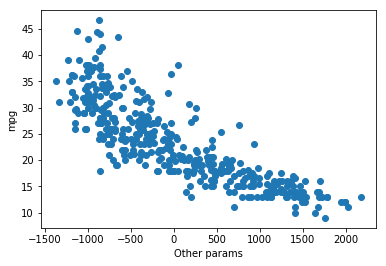

In [13]:
fig,ax = plt.subplots()
ax.scatter(X_1d,df.mpg)
ax.set(xlabel='Other params',ylabel='mpg')


In [52]:
features = ['cylinders','displacement','horsepower','weight','acceleration','origin']
dim1 = df.loc[:,features].values

print(dim1.shape)
dim2 = df.loc[:,['model_year']].values
print(dim2.shape)
dim1 =StandardScaler().fit_transform(dim1)
print(dim1.shape)

pca2dim = PCA(n_components=2)
principalComponents = pca2dim.fit_transform(dim1)
principaldf = pd.DataFrame(data = principalComponents,
                           columns=['principal component1','principal component 2'])

finaldf = pd.concat([principaldf,df[['model_year']]],axis=1)

dim2fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=5)
ax.set_ylabel('Principal Component 2',fontsize=5)

targets = ['70','71','72']#,'73','74','75''76','77''78','79','80','81','82'

colors = ['r','g','b']

print(finaldf['model_year'])
for target, color in zip(targets,colors):
    print(target)
    if(target in finaldf['model_year']):
        indicesToKeep = target
        ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
                   , finaldf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
ax.legend(targets)
ax.grid()
dim2fig.show()

(392, 6)
(392, 1)
(392, 6)
0      70.0
1      70.0
2      70.0
3      70.0
4      70.0
5      70.0
6      70.0
7      70.0
8      70.0
9      70.0
10     70.0
11     70.0
12     70.0
13     70.0
14     70.0
15     70.0
16     70.0
17     70.0
18     70.0
19     70.0
20     70.0
21     70.0
22     70.0
23     70.0
24     70.0
25     70.0
26     70.0
27     70.0
28     70.0
29     71.0
       ... 
368    82.0
369    82.0
370    82.0
371    82.0
372    82.0
373    82.0
374     NaN
375    82.0
376    82.0
377    82.0
378    82.0
379    82.0
380    82.0
381    82.0
382    82.0
383    82.0
384    82.0
385    82.0
386    82.0
387    82.0
388    82.0
389    82.0
390    82.0
391    82.0
392    82.0
393    82.0
394    82.0
395    82.0
396    82.0
397    82.0
Name: model_year, Length: 398, dtype: float64
70
71
72


C:\Users\thang\Anaconda3\envs\mldds02\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\thang\Anaconda3\envs\mldds02\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 576x576 with 0 Axes>

In [42]:
#plotting in a 3D space
from mpl_toolkits.mplot3d import Axes3D

In [44]:
## TO check slack and update
fig = plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

In [59]:
from sklearn.model_selection import train_test_split 
#Train test split
#random_state --> if same then the entire class has the same sequence in train , test etc.
y=df.mpg
train_x , test_x , train_y, test_y = train_test_split(X,y,test_size=.1,random_state=40)

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(352, 7) (352,)
(40, 7) (40,)


In [60]:
train_x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
240,4,97.0,78.0,2190.0,14.1,77,2
189,8,304.0,120.0,3962.0,13.9,76,1
154,6,250.0,72.0,3432.0,21.0,75,1
177,4,115.0,95.0,2694.0,15.0,75,2
381,4,107.0,75.0,2205.0,14.5,82,3
134,6,258.0,110.0,3632.0,18.0,74,1
12,8,400.0,150.0,3761.0,9.5,70,1
353,4,105.0,74.0,2190.0,14.2,81,2
372,4,151.0,90.0,2735.0,18.0,82,1
387,6,262.0,85.0,3015.0,17.0,82,1


In [61]:
from sklearn.preprocessing import StandardScaler

#Two scalars are needed one for X & once for Y

x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_scaler.fit(train_x)
train_x_scaled = x_scaler.transform(train_x)
test_x_scaled = x_scaler.transform(test_x)

# from 1 dimension change to 2 dimensions
y_temp=train_y.values.reshape(-1,1)
y_scaler.fit(y_temp)
train_y_scaled = y_scaler.transform(y_temp)
test_y_scaled = y_scaler.transform(test_y.values.reshape(-1,1))

In [62]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error , r2_score

lin = LinearRegression()
lin.fit(train_x_scaled,train_y_scaled)
pred_scaled = lin.predict(test_x_scaled)

print(mean_squared_error(test_y_scaled,pred_scaled))
print(r2_score(test_y_scaled,pred_scaled))

0.15914186049625653
0.7987296422630643
